<a href="https://colab.research.google.com/github/majumderarnob/BRACU_CSE428-Image_Processing/blob/main/CSE428%20Lab%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
from skimage.io import imread
from skimage import img_as_float, data, io
from skimage.color import rgb2gray
from numpy import pad
from skimage.util import random_noise


import numpy as np

from scipy import signal

import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Helper functions

In [3]:
def plot_image(img,figsize=(5,5)):
    plt.figure(figsize=figsize)
    if len(img.shape)==2:
        plt.imshow(img, cmap="gray")
    else:
        plt.imshow(img)
    plt.axis("off")
    plt.show()
    print("Image shape: ", img.shape)

def plot_kernel(kernel, cmap="Reds"):
    plt.imshow(kernel, interpolation='none', cmap="Reds")
    plt.colorbar()
    plt.show()
    print("Kernel shape: ", kernel.shape)

def gaussian2D(size, sigma):
  x = np.linspace(0, size, size)
  y = np.linspace(0, size, size)
  x1, y1 = np.meshgrid(x, y)
  z = np.exp(-((x1 - size // 2) ** 2 + (y1 - size // 2) ** 2) / (2 * (sigma ** 2)))
  z = z/((((2*np.pi)**0.5)*sigma)**2)

  return z

def box_kernel(size=5):
    return np.ones((size, size))/size**2

In [4]:
img = data.coffee()
print("Image shape:", img.shape)

Image shape: (400, 600, 3)


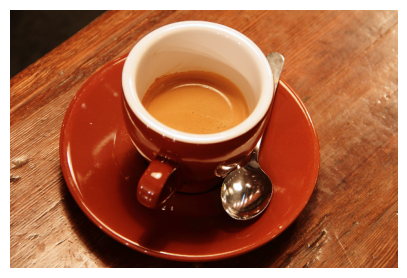

Image shape:  (400, 600, 3)


In [5]:
plot_image(img)

# Padding

ref: https://numpy.org/doc/stable/reference/generated/numpy.pad.html


In [6]:
pad_width = 200

In [7]:
img_white_padded = pad(img, pad_width=[(pad_width, pad_width),(pad_width, pad_width),(0, 0)], mode="constant", constant_values=255)
img_zero_padded = pad(img, pad_width=[(pad_width, pad_width),(pad_width, pad_width),(0, 0)], mode="constant", constant_values=0)
img_constant_padded = pad(img, pad_width=[(pad_width, pad_width),(pad_width, pad_width),(0, 0)], mode="constant", constant_values=200)
img_edge_padded = pad(img, pad_width=[(pad_width, pad_width),(pad_width, pad_width),(0, 0)], mode="edge")
img_mirror_padded = pad(img, pad_width=[(pad_width, pad_width),(pad_width, pad_width),(0, 0)], mode="reflect")
img_linear_ramp_padded = pad(img, pad_width=[(pad_width, pad_width),(pad_width, pad_width),(0, 0)], mode="linear_ramp")

In [8]:
img.shape

(400, 600, 3)

In [9]:
img_white_padded.shape

(800, 1000, 3)

(-0.5, 999.5, 799.5, -0.5)

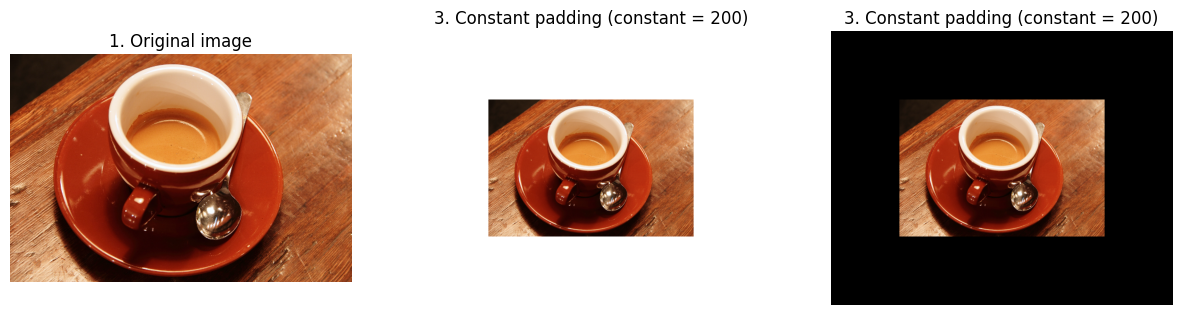

In [10]:
#Multiple plots using pyplot
fig = plt.figure(figsize=(15, 10))

plt.subplot(2,3,1)
plt.imshow(img)
plt.title("1. Original image")
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(img_white_padded)
plt.title("3. Constant padding (constant = 200)")
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(img_zero_padded)
plt.title("3. Constant padding (constant = 200)")
plt.axis('off')

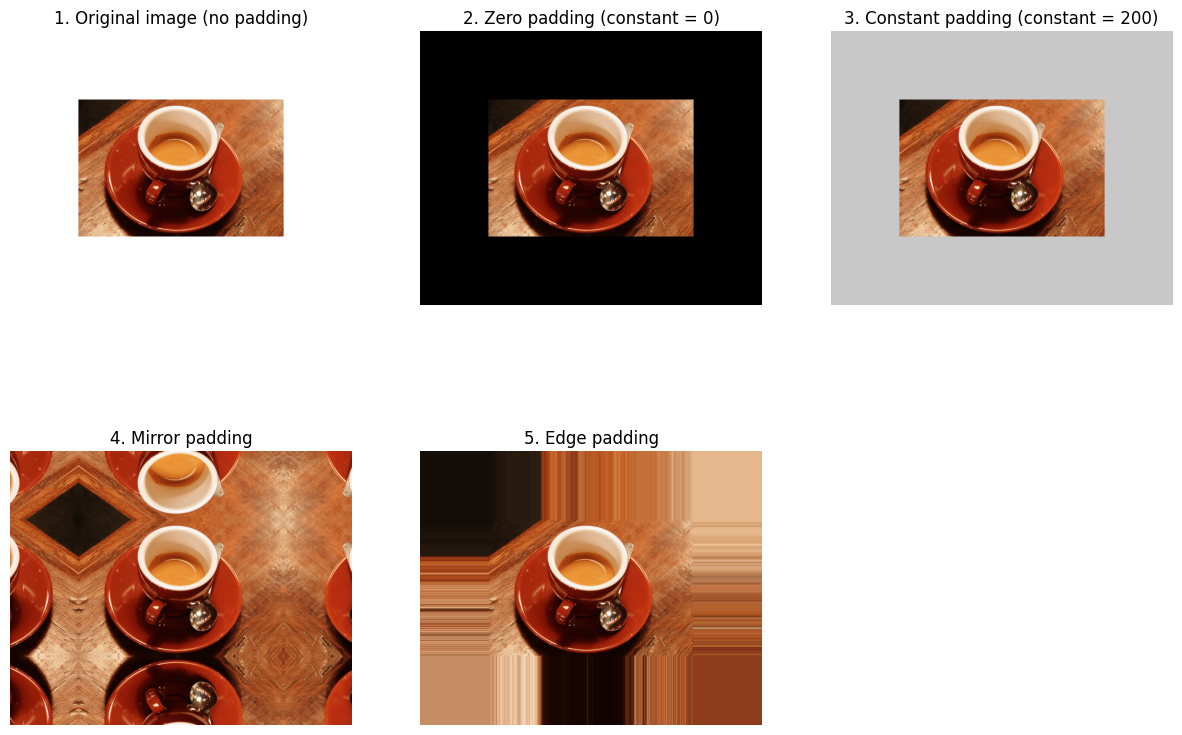

In [11]:
#Multiple plots using pyplot
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(2,3,1)
ax1.imshow(img_white_padded)
# referring white_padded as original to show all the images in the same scale,
# might not work if your notebook background is not white! :P
ax1.title.set_text('1. Original image (no padding)')
ax1.axis("off")

ax2 = fig.add_subplot(2,3,2)
ax2.imshow(img_zero_padded)
ax2.title.set_text('2. Zero padding (constant = 0)')
ax2.axis("off")

ax3 = fig.add_subplot(2,3,3)
ax3.imshow(img_constant_padded)
ax3.title.set_text('3. Constant padding (constant = 200)')
ax3.axis("off")

ax4 = fig.add_subplot(2,3,4)
ax4.imshow(img_mirror_padded)
ax4.title.set_text('4. Mirror padding')
ax4.axis("off")

ax5 = fig.add_subplot(2,3,5)
ax5.imshow(img_edge_padded)
ax5.title.set_text('5. Edge padding')
ax5.axis("off")



plt.show()

In [12]:
img = io.imread("/content/gdrive/MyDrive/CSE428 Lab/nature.jpg")
print(img.shape)

(408, 612, 3)


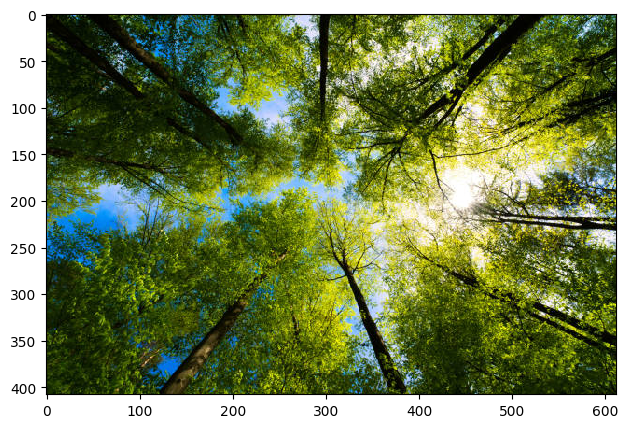

In [13]:
io.imshow(img)

In [17]:
pad_width = 20

In [18]:
img_white_padded = pad(img, pad_width=[(pad_width, pad_width),(pad_width, pad_width),(0, 0)], mode="constant", constant_values=255)
img_zero_padded = pad(img, pad_width=[(pad_width, pad_width),(pad_width, pad_width),(0, 0)], mode="constant", constant_values=0)
img_constant_padded = pad(img, pad_width=[(pad_width, pad_width),(pad_width, pad_width),(0, 0)], mode="constant", constant_values=200)
img_edge_padded = pad(img, pad_width=[(pad_width, pad_width),(pad_width, pad_width),(0, 0)], mode="edge")
img_mirror_padded = pad(img, pad_width=[(pad_width, pad_width),(pad_width, pad_width),(0, 0)], mode="reflect")
img_linear_ramp_padded = pad(img, pad_width=[(pad_width, pad_width),(pad_width, pad_width),(0, 0)], mode="linear_ramp")

In [19]:
img_white_padded.shape

(448, 652, 3)

(-0.5, 651.5, 447.5, -0.5)

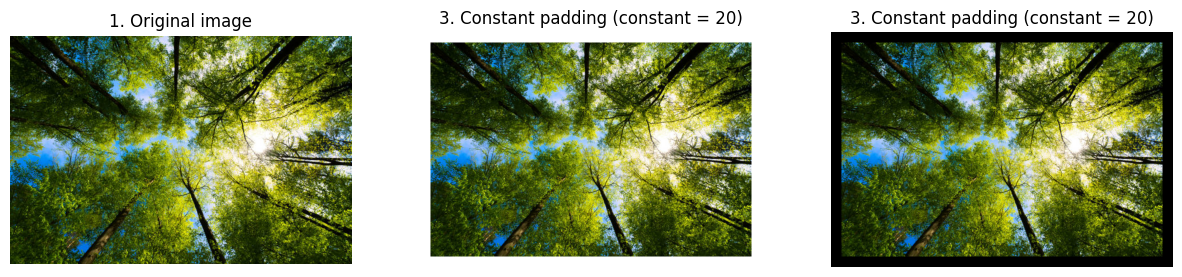

In [20]:
#Multiple plots using pyplot
fig = plt.figure(figsize=(15, 10))

plt.subplot(2,3,1)
plt.imshow(img)
plt.title("1. Original image")
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(img_white_padded)
plt.title("3. Constant padding (constant = 20)")
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(img_zero_padded)
plt.title("3. Constant padding (constant = 20)")
plt.axis('off')

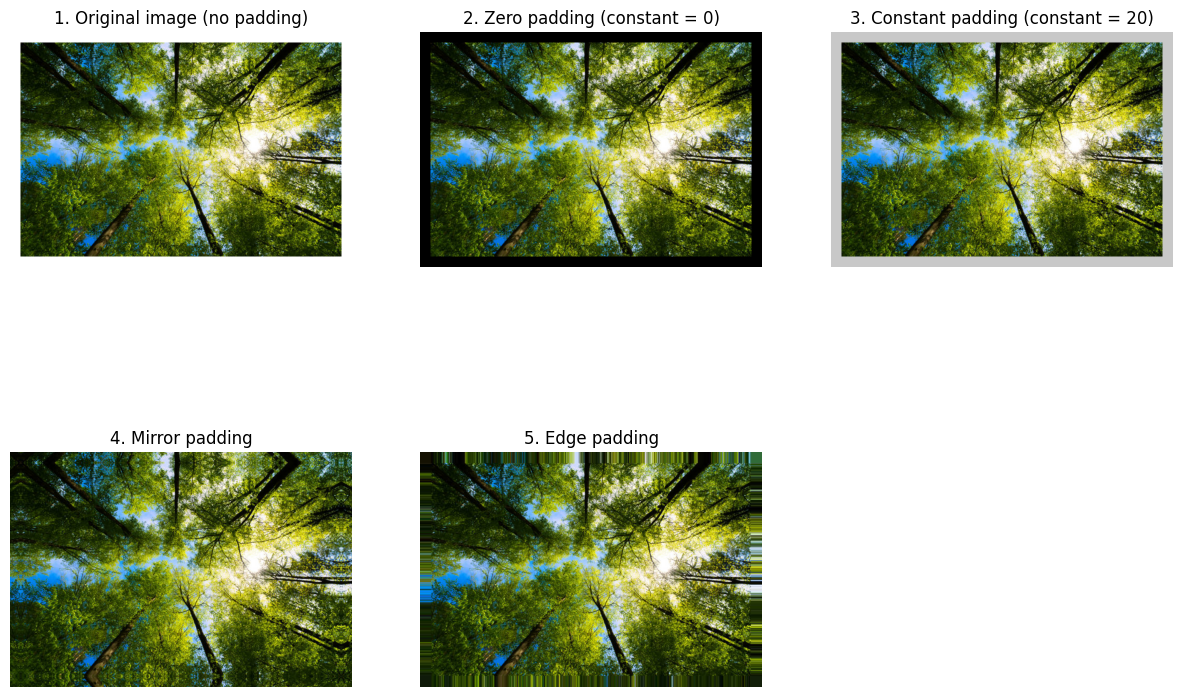

In [21]:
#Multiple plots using pyplot
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(2,3,1)
ax1.imshow(img_white_padded)
# referring white_padded as original to show all the images in the same scale,
# might not work if your notebook background is not white! :P
ax1.title.set_text('1. Original image (no padding)')
ax1.axis("off")

ax2 = fig.add_subplot(2,3,2)
ax2.imshow(img_zero_padded)
ax2.title.set_text('2. Zero padding (constant = 0)')
ax2.axis("off")

ax3 = fig.add_subplot(2,3,3)
ax3.imshow(img_constant_padded)
ax3.title.set_text('3. Constant padding (constant = 20)')
ax3.axis("off")

ax4 = fig.add_subplot(2,3,4)
ax4.imshow(img_mirror_padded)
ax4.title.set_text('4. Mirror padding')
ax4.axis("off")

ax5 = fig.add_subplot(2,3,5)
ax5.imshow(img_edge_padded)
ax5.title.set_text('5. Edge padding')
ax5.axis("off")


plt.show()

# Linear filtering

## *grayscale* image

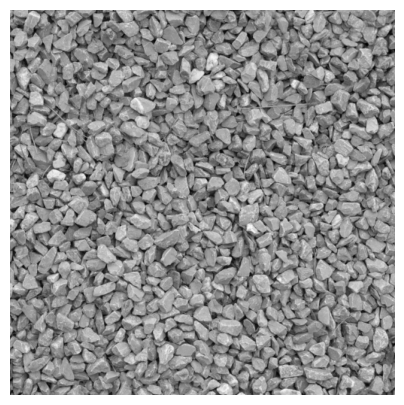

Image shape:  (512, 512)


In [ ]:
## IMPORT & PLOT IMAGE

img = data.gravel()
plot_image(img)

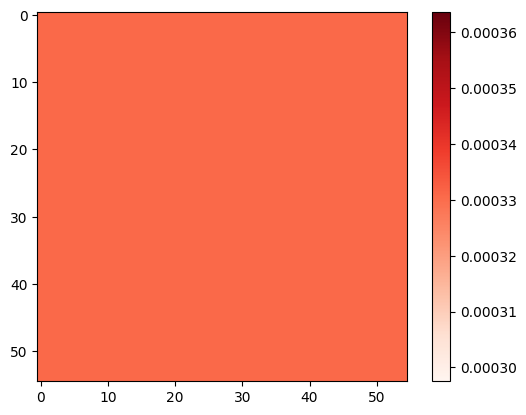

Kernel shape:  (55, 55)


array([[0.00033058, 0.00033058, 0.00033058, ..., 0.00033058, 0.00033058,
        0.00033058],
       [0.00033058, 0.00033058, 0.00033058, ..., 0.00033058, 0.00033058,
        0.00033058],
       [0.00033058, 0.00033058, 0.00033058, ..., 0.00033058, 0.00033058,
        0.00033058],
       ...,
       [0.00033058, 0.00033058, 0.00033058, ..., 0.00033058, 0.00033058,
        0.00033058],
       [0.00033058, 0.00033058, 0.00033058, ..., 0.00033058, 0.00033058,
        0.00033058],
       [0.00033058, 0.00033058, 0.00033058, ..., 0.00033058, 0.00033058,
        0.00033058]])

In [ ]:
## DEFINE & PLOT KERNEL

# kernel shape (k, k). k should be odd
k = 55

# spread for gaussian, spread > 1
spread = k/3 # or define manually

# calculate pad width from (k-1) / 2
pad_width = int((k-1)/2)

# define either a box kernel or a gaussian kernel by calling the pre defined functions
kernel = gaussian2D(size=k, sigma=spread)
kernel = box_kernel(size=k)
plot_kernel(kernel)
kernel

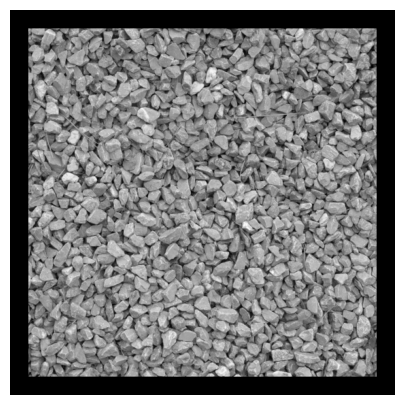

Image shape:  (566, 566)


In [ ]:
# pad image
img_zero_padded = pad(img, pad_width=pad_width, mode="constant", constant_values=0)

plot_image(img_zero_padded)

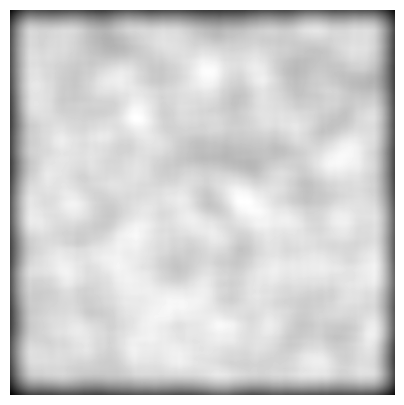

Image shape:  (512, 512)


In [ ]:
# filter img with kernel via correlation
img_filtered = signal.correlate(img_zero_padded, kernel, mode='valid', method='auto') # experiment with method="direct"

plot_image(img_filtered)

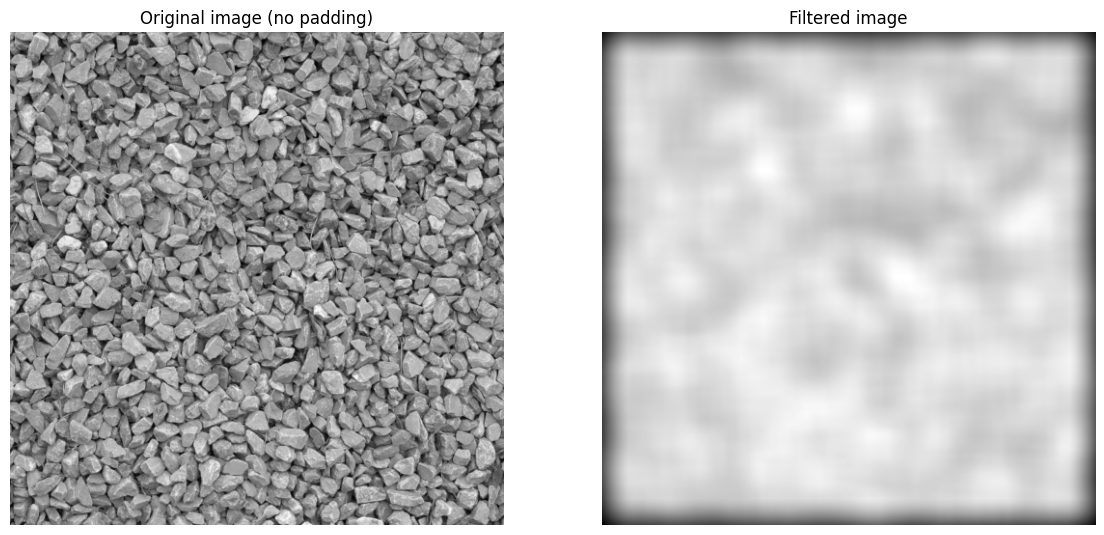

In [ ]:
#Multiple plots using pyplot
fig = plt.figure(figsize=(14, 7))

ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img, cmap="gray")
ax1.title.set_text('Original image (no padding)')
ax1.axis("off")

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img_filtered, cmap="gray")
ax2.title.set_text('Filtered image')
ax2.axis("off")
plt.show()

## *color* image

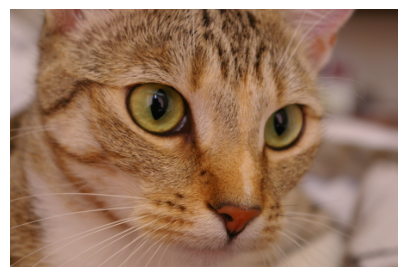

Image shape:  (300, 451, 3)


In [ ]:
img = data.cat()
plot_image(img)

In [ ]:
# kernel shape (k, k). k should be odd
k = 25

# spread for gaussian, spread > 1
spread = 8 # or define manually

# calculate pad width from (k-1) / 2
pad_width = int((k-1)/2)

# define kernel
kernel = gaussian2D(size=k, sigma=spread)
# kernel = box_kernel(size=k)
# plot_kernel(kernel)

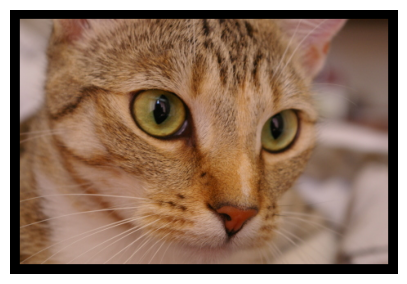

Image shape:  (324, 475, 3)


In [ ]:
# pad image

img_zero_padded = pad(img, pad_width=[(pad_width, pad_width),(pad_width, pad_width),(0, 0)], mode="constant", constant_values=0)
plot_image(img_zero_padded)

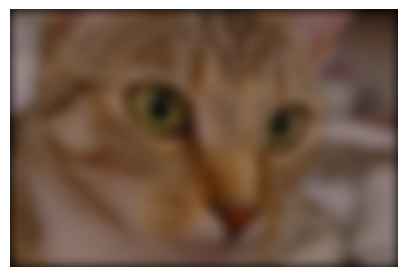

Image shape:  (300, 451, 3)


In [ ]:
# filter img with kernel via correlation
img_filtered = np.zeros_like(img)

for i in range(img_zero_padded.shape[-1]):
  img_filtered[:,:,i] = signal.correlate(img_zero_padded[:,:,i], kernel, mode='valid', method='auto') # experiment with method="direct", took 4m40s for me

plot_image(img_filtered)

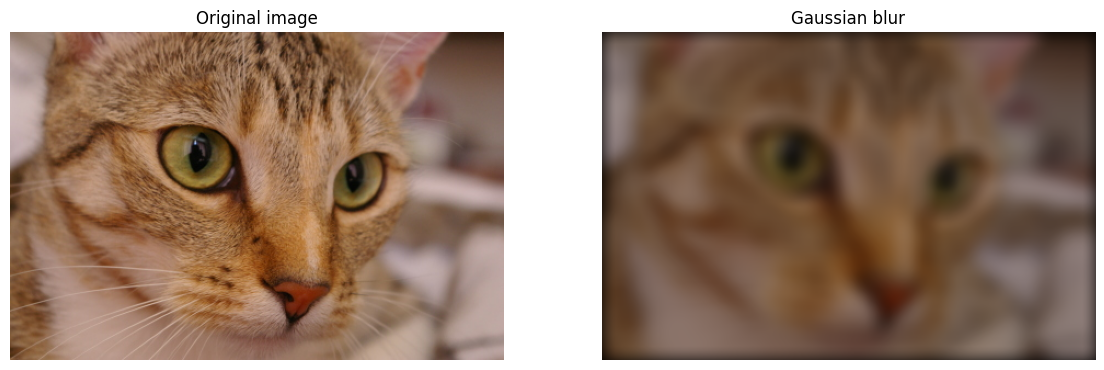

In [ ]:
#Multiple plots using pyplot
fig = plt.figure(figsize=(14, 7))

ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img, cmap="gray")
ax1.title.set_text('Original image')
ax1.axis("off")

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img_filtered, cmap="gray")
ax2.title.set_text('Gaussian blur')
ax2.axis("off")

plt.show()

## Effect of increasing the kernel size

In [ ]:
k_all = [25, 55, 205]

filters_box = [np.zeros_like(img) for _ in range(len(k_all))]
filtered_img_all_box = np.stack(filters_box, axis=-1)

spread = 9

for i, k_unique in enumerate(k_all):
  # kernel = gaussian_kernel(spread, size=k_unique)
  kernel = box_kernel(size=k_unique)
  for j in range(img.shape[-1]):
    filtered_img_all_box[:,:,j, i] = signal.correlate(img[:,:,j], kernel, mode='same', method='auto')

filters_gauss = [np.zeros_like(img) for _ in range(len(k_all))]
filtered_img_all_gaussian = np.stack(filters_gauss, axis=-1)

for i, k_unique in enumerate(k_all):
  kernel = gaussian2D(size=k_unique, sigma=spread)
  # kernel = box_kernel(size=k_unique)
  for j in range(img.shape[-1]):
    filtered_img_all_gaussian[:,:,j, i] = signal.correlate(img[:,:,j], kernel, mode='same', method='auto')

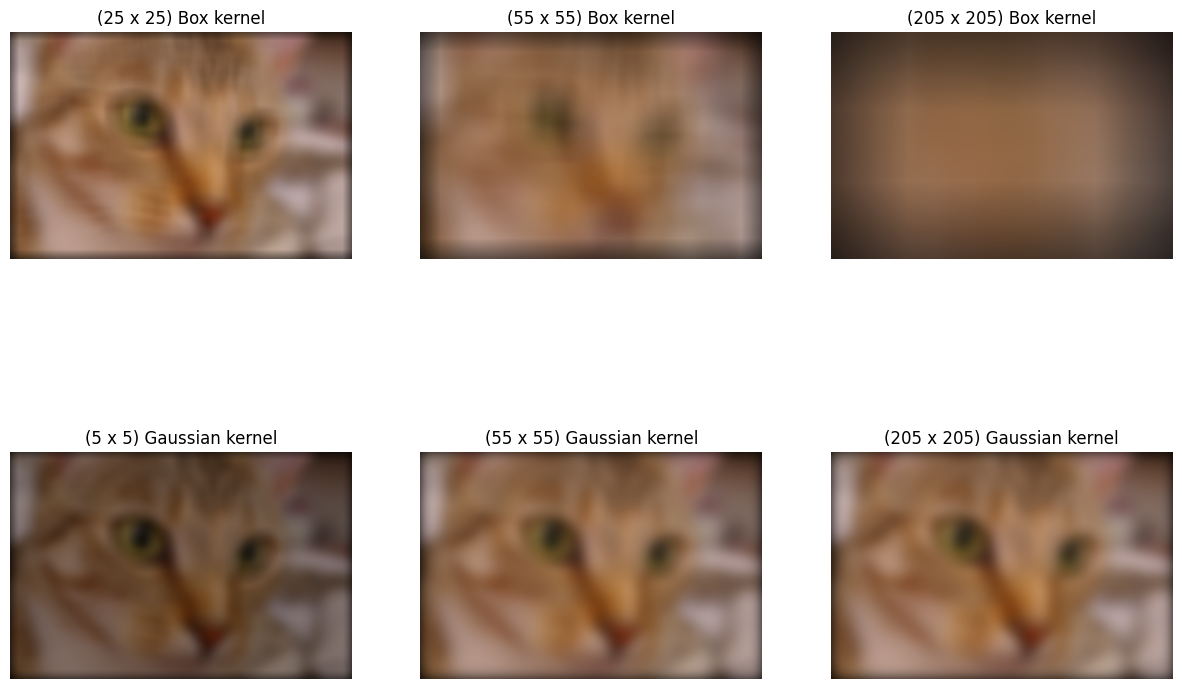

In [ ]:
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(2,3,1)
ax1.imshow(filtered_img_all_box[:,:,:,0])
ax1.title.set_text('(25 x 25) Box kernel')
ax1.axis("off")

ax2 = fig.add_subplot(2,3,2)
ax2.imshow(filtered_img_all_box[:,:,:,1])
ax2.title.set_text('(55 x 55) Box kernel')
ax2.axis("off")

ax3 = fig.add_subplot(2,3,3)
ax3.imshow(filtered_img_all_box[:,:,:,2])
ax3.title.set_text('(205 x 205) Box kernel')
ax3.axis("off")

ax4 = fig.add_subplot(2,3,4)
ax4.imshow(filtered_img_all_gaussian[:,:,:,0])
ax4.title.set_text('(5 x 5) Gaussian kernel')
ax4.axis("off")

ax5 = fig.add_subplot(2,3,5)
ax5.imshow(filtered_img_all_gaussian[:,:,:,1])
ax5.title.set_text('(55 x 55) Gaussian kernel')
ax5.axis("off")

ax6 = fig.add_subplot(2,3,6)
ax6.imshow(filtered_img_all_gaussian[:,:,:,2])
ax6.title.set_text('(205 x 205) Gaussian kernel')
ax6.axis("off")

plt.show()

# De-noising

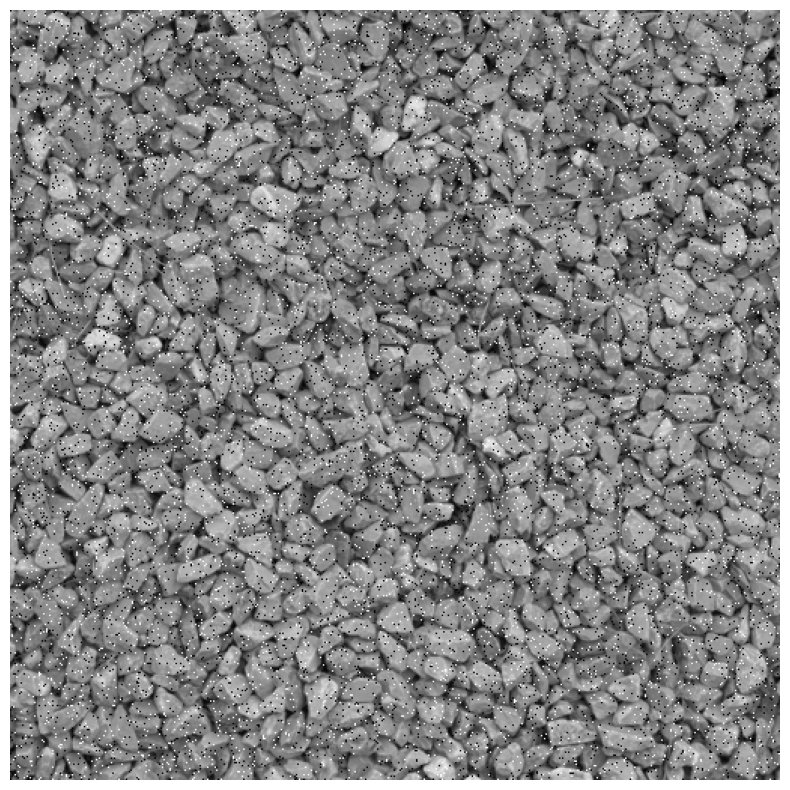

Image shape:  (512, 512)


In [ ]:
# salt-and-pepper noise can be applied only to greyscale images
# Reading the color image in greyscale image
img_gray = data.gravel()
noisy_image_sp = random_noise(img_gray, mode='s&p')

kernel = gaussian2D(10, 1)

#Storing the image
plot_image(noisy_image_sp, figsize=(10,10))

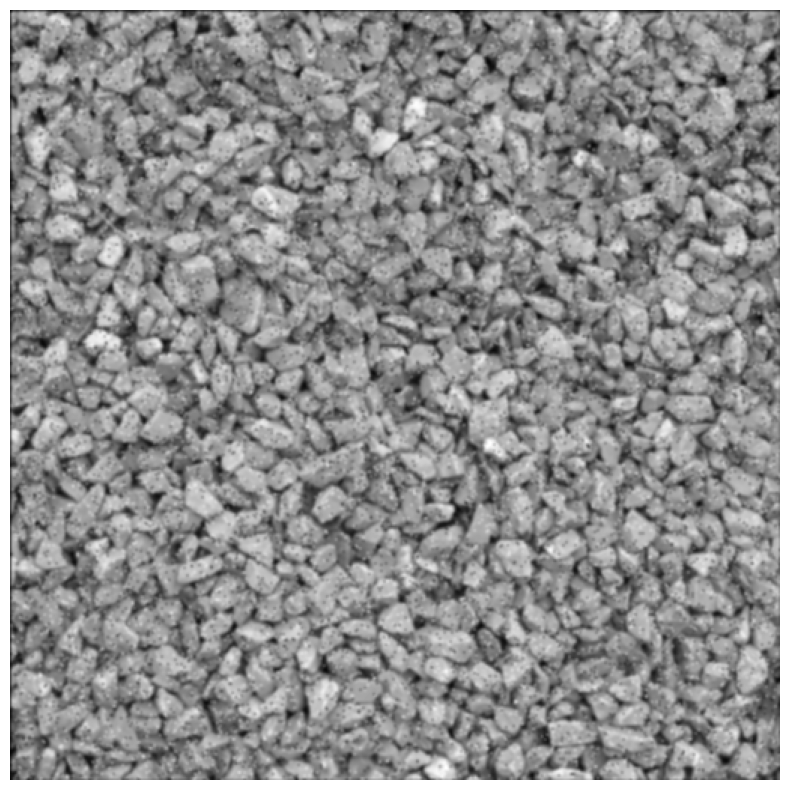

Image shape:  (512, 512)


In [ ]:
img_filtered = signal.correlate(noisy_image_sp, kernel, mode='same', method='auto')

plot_image(img_filtered, figsize=(10,10))

In [ ]:
from skimage.filters import median

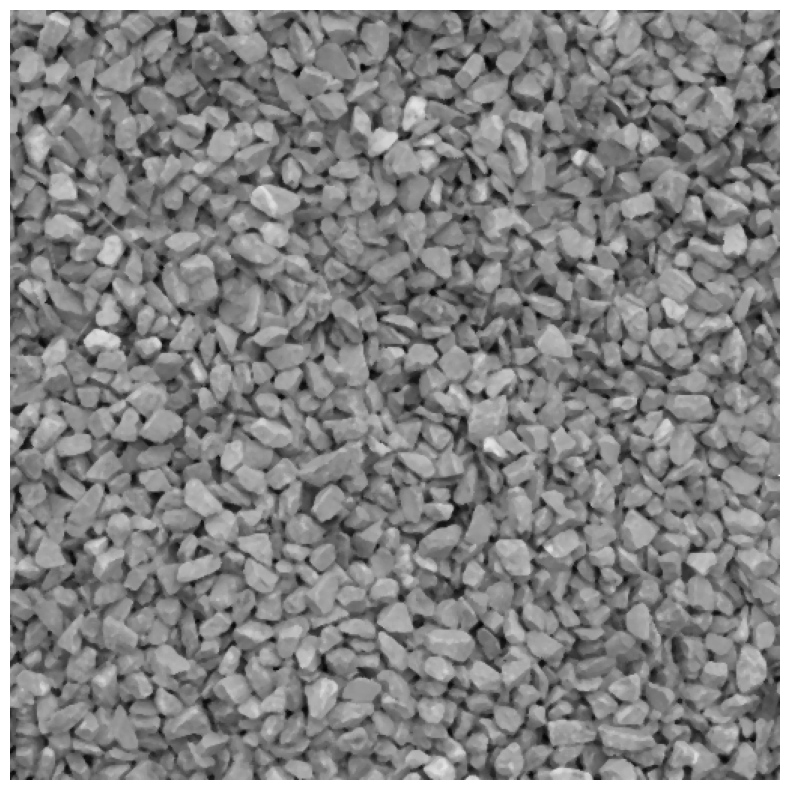

Image shape:  (512, 512)


In [ ]:
img_filtered_median = median(noisy_image_sp)
plot_image(img_filtered_median, figsize=(10,10))

In [ ]:
x = np.linspace(0, 10, 10)
y = np.linspace(0, 10, 10)
x1, y1 = np.meshgrid(x, y)

In [ ]:
np.meshgrid(x,y)

[array([[ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
          5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ],
        [ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
          5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ],
        [ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
          5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ],
        [ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
          5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ],
        [ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
          5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ],
        [ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
          5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ],
        [ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
          5.55555556,  6.6666666

In [ ]:
type(x1)

numpy.ndarray

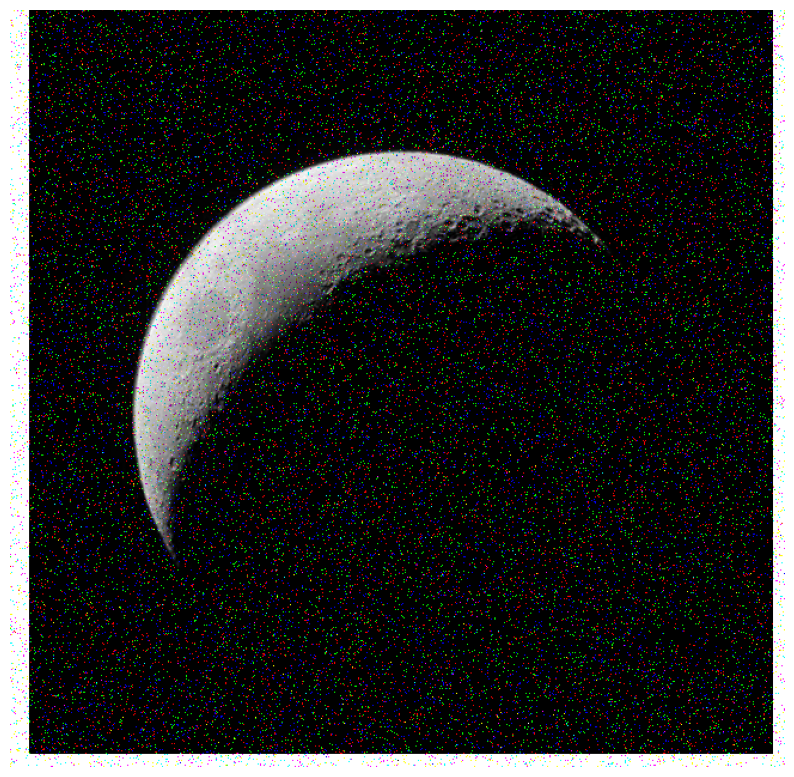

Image shape:  (633, 648, 3)


In [ ]:
# img_gray = data.gravel()
img_gray = io.imread("/content/gdrive/MyDrive/CSE428 Lab/moon.png")
noisy_image_sp = random_noise(img_gray, mode='s&p')

kernel = gaussian2D(10, 1)

#Storing the image
plot_image(noisy_image_sp, figsize=(10,10))


In [ ]:
from skimage.filters import median

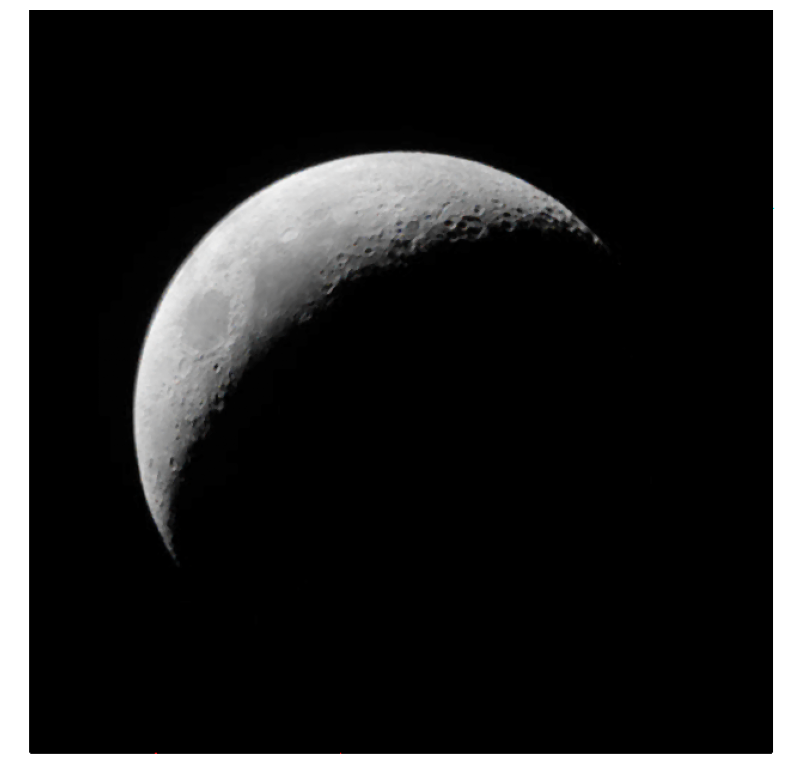

Image shape:  (633, 648, 3)


In [ ]:
img_filtered_median = median(noisy_image_sp)
plot_image(img_filtered_median, figsize=(10,10))

In [22]:
x = np.linspace(0, 10, 10)
y = np.linspace(0, 10, 10)
x1, y1 = np.meshgrid(x, y)